# Project: Investigate the European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">1 Introduction</a></li>
<li><a href="#wrangling">2 Data Wrangling</a></li>
<li><a href="#eda">3 Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4 Conclusion and limitations</a></li>
<li><a href="#Appendix">5 Appendix</a></li>  
</ul>

<a id='intro'></a>
## 1 Introduction

> Since I was a big fun of football, the Soccer Database sounds super interesting. Therefore, I selected is from European Soccer Database. The European Soccer Database includes information regarding more than 25000 matches and 10,000+ players from 2008 to 2016. The data are stored in a .sqlite file. The file has 5 tables, Country, League, Match, Player, Player_Attributes, Team and Team_Attributes. Players and Teams' attributes are extracted from EA Sports' FIFA vidoe game series, including the weekly updates. The data used for this analysis **do not contain** the new table '16th Oct 2016'.
 
> Since the atabase is quite extensive, relavent data is selected and extracted from database using SQL and exported to .csv files. Codes for data extraction is attached in Appendix section.

### Questions:
* Are home teams easier to win?
* Which League has the most number of goals?
* How does age affect the potential of the player?
* What team attributes lead to vectories?

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
%matplotlib inline

<a id='wrangling'></a>
## 2 Data Wrangling
> **Datasets:** In this reports, calculation and analysis are based on three datasets, namely Match_data, Player_data and Team_Attributes.

### 2.1 Import datasets

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_match = pd.read_csv('Match_data.csv')
df_player = pd.read_csv('Player_data.csv')
df_team_attr = pd.read_csv('Team_Attributes.csv')

In [3]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   league_id         25979 non-null  int64 
 1   season            25979 non-null  object
 2   home_team_goal    25979 non-null  int64 
 3   away_team_goal    25979 non-null  int64 
 4   home_team_api_id  25979 non-null  int64 
 5   away_team_api_id  25979 non-null  int64 
 6   date              25979 non-null  object
 7   name              25979 non-null  object
dtypes: int64(5), object(3)
memory usage: 1.6+ MB


### 2.2 General Properties
#### 2.2.1 Dataset: Match_data
The dataset has 8 columns and 25979 rows without any missing values. However, the `date`column stores strings and needs to be parsed to datetime format.

In [4]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player_api_id   183978 non-null  int64  
 1   overall_rating  183142 non-null  float64
 2   potential       183142 non-null  float64
 3   date            183978 non-null  object 
 4   birthday        183978 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 7.0+ MB


#### 2.2.2 Dataset: Player_data
The dataset has 5 columns and more than 180000 rows. Notice that column `overall_rating` and `potential` has missing values. Moreover, `date` and `birthday` data are strings and need to be parsed to datetime later.

In [5]:
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   team_api_id               1458 non-null   int64  
 1   date                      1458 non-null   object 
 2   buildUpPlaySpeed          1458 non-null   int64  
 3   buildUpPlayDribbling      489 non-null    float64
 4   buildUpPlayPassing        1458 non-null   int64  
 5   chanceCreationPassing     1458 non-null   int64  
 6   chanceCreationCrossing    1458 non-null   int64  
 7   chanceCreationShooting    1458 non-null   int64  
 8   defencePressure           1458 non-null   int64  
 9   defenceAggression         1458 non-null   int64  
 10  defenceTeamWidth          1458 non-null   int64  
 11  defenceDefenderLineClass  1458 non-null   object 
dtypes: float64(1), int64(9), object(2)
memory usage: 136.8+ KB


#### 2.2.3 Dataset: Team_Attributes
The dataset has 12 columns and 1458 rows except for `buildUpPlayDribbing`. Since the `buildUpPlayerDribbling` has more than 50% of missing values, this column will be dropped later. The `date` column will be parsed to datetime format.

### 2.3 Data Cleaning for the Player Data
According to the proporties exploring, the tasks need to be done for each datasets is list below:
* Dataset: Match_data
    * Parse `date` to datetime format.
* Dataset: Player_data
    * Drop the rows with missing values
    * Parse `date` and `birthday` to datetime format
    * Calculate age from `date` and `birthday` and create a new column `Age`
* Dataset: Team_Attributes
    * drop column `buildUpPlayerDribbing`
    * parse `date` to datetime format

#### 2.3.1 Clean Match_data 

In [6]:
# parse data to datetime and add a new column `year`
df_match['year'] = pd.DatetimeIndex(df_match.date).year

#### 2.3.2 Clean Player_data 

In [7]:
# Explore the propotion of null values in the df_player data
num_missing = df_player[df_player.potential.isnull()].shape[0] # number of records with missing values
num_total = df_player.shape[0] # total number of records
print('{}'.format(round(num_missing/num_total*100,2))+'% of the total records has missing values')

0.45% of the total records has missing values


In [8]:
# Drop the rows with missing values
df_player.dropna(inplace = True)
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player_api_id   183142 non-null  int64  
 1   overall_rating  183142 non-null  float64
 2   potential       183142 non-null  float64
 3   date            183142 non-null  object 
 4   birthday        183142 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 8.4+ MB


In [9]:
# Calculate Age from date and birthday and create a new column `Age` for the data.
# Since one player can have several data points in the same year, ages are rounded to two decimal places.
# Assume one-year has 365 days.
df_player.date = pd.to_datetime(df_player.date)
df_player.birthday = pd.to_datetime(df_player.birthday)
df_player['Age'] = round((df_player.date - df_player.birthday)/datetime.timedelta(days = 365),2)

#### 2.3.3 Clean Team_Atrributes

In [10]:
# drop buildUpPlayDribbling
df_team_attr.drop('buildUpPlayDribbling',axis = 1,inplace = True)
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   team_api_id               1458 non-null   int64 
 1   date                      1458 non-null   object
 2   buildUpPlaySpeed          1458 non-null   int64 
 3   buildUpPlayPassing        1458 non-null   int64 
 4   chanceCreationPassing     1458 non-null   int64 
 5   chanceCreationCrossing    1458 non-null   int64 
 6   chanceCreationShooting    1458 non-null   int64 
 7   defencePressure           1458 non-null   int64 
 8   defenceAggression         1458 non-null   int64 
 9   defenceTeamWidth          1458 non-null   int64 
 10  defenceDefenderLineClass  1458 non-null   object
dtypes: int64(9), object(2)
memory usage: 125.4+ KB


In [11]:
# parse `date` to `year`
df_team_attr['year'] = pd.DatetimeIndex(df_team_attr.date).year

<a id='eda'></a>
## 3 Exploratory Data Analysis
### 3.1 Question 1: Are home teams easier to win?
> In this section, we compared the home team wins and away team wins. In order to gain a general image of home win and away win, a barplot was used to compare the two dataset for all matches. Then a deeper investigation regarding home win was conducted by plotting the two datasets by season and league.

#### 3.1.1 Comparson between home win and away win in general

In [12]:
# extract home_win match and away_win match,
# and calculate the precentage of home win and away win among all matches.
home_win = df_match.home_team_goal > df_match.away_team_goal  
Draw = df_match.home_team_goal == df_match.away_team_goal  
away_win = df_match.home_team_goal < df_match.away_team_goal 
total_home_win = df_match[home_win].shape[0]
total_away_win = df_match[away_win].shape[0]
print('Among all matches, {}'.format(round(total_home_win*100/df_match.shape[0],2))+'% is home win.')
print('Among all matches, {}'.format(round(total_away_win*100/df_match.shape[0],2))+'% is away win.')

Among all matches, 45.87% is home win.
Among all matches, 28.74% is away win.


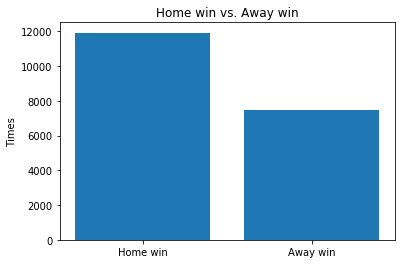

In [13]:
# show the results in bar plot.
x = ['Home win','Away win']
y = [total_home_win, total_away_win]

plt.bar(x,y)
plt.ylabel('Times')
plt.title('Home win vs. Away win');

#### 3.1.2 Comparson by season
The figure above demonstrates that soccers teams perform better at home than they are away. This result is consist with the common knowledge of home advantage. However, this result can be due to the randomness of the data. Therefore, a deeper investigation on home win rate in different seasons and leagues are conducted.

In [14]:
# calculate the home win and away win in different seasons
# data is stored as list.
seasons = df_match['season'].unique()
home_win_s = []
away_win_s = []
for u_s in seasons:
    df1 = df_match[df_match.season == u_s]
    home_win_s.append(df1[df1.home_team_goal > df1.away_team_goal ].shape[0])
    df2 = df_match[df_match.season == u_s]
    away_win_s.append(df2[df2.home_team_goal < df2.away_team_goal ].shape[0])

**Correction: Plot function**

In [15]:
def plot_detail(df,xlab,ylab,title,rot,top = 1900):
    # xlab: xlabel(str), ylab: ylabel(str), title: title of plot(str)
    ax = df.plot.bar(rot=0)
    ax.tick_params(axis = 'x',rotation = rot)
    plt.ylim(top = top)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title);

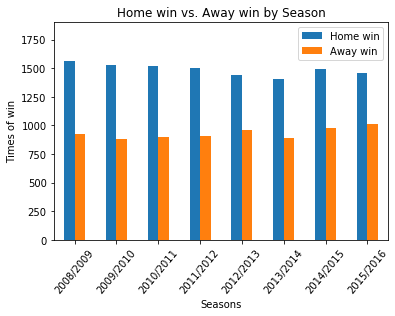

In [16]:
df = pd.DataFrame({'Home win': home_win_s,
                   'Away win': away_win_s}, index=seasons)

plot_detail(df,'Seasons','Times of win','Home win vs. Away win by Season',50)

#### 3.1.3 Home win by leagues
The figure above illustrates that the home win is greater than away win for all the seasons. This result is consistance with the general trend mentioned in the section 3.2. 

Matches can also be grouped by league. It is interesting to know if home advantage exists for different leagues.

In [17]:
# calculate the home win and away win in different leagues
# data is stored as list.
Leagues = df_match['name'].unique()
home_win_s = []
away_win_s = []
for u_s in Leagues:
    df1 = df_match[df_match.name == u_s]
    home_win_s.append(df1[df1.home_team_goal > df1.away_team_goal ].shape[0])
    df2 = df_match[df_match.name == u_s]
    away_win_s.append(df1[df1.home_team_goal < df1.away_team_goal ].shape[0])

In [18]:
# The league names were shorten to their first word for the convenience of plotting.
short_leagues = sorted(Leagues[i].split()[0] for i in range(len(Leagues)))

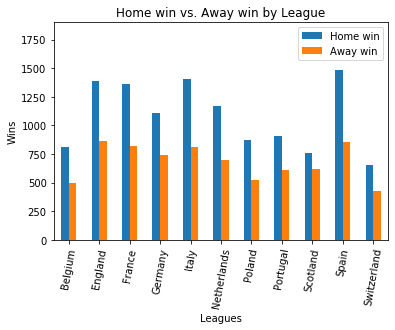

In [19]:
df = pd.DataFrame({'Home win': home_win_s,
                   'Away win': away_win_s}, index=short_leagues)
plot_detail(df,'Leagues','Wins','Home win vs. Away win by League',80)

For different leagues, the home win is lower than away win as shown in the figure above.

All three figures show that the team advantage is existing regardless seasons and leagues.

### 3.2 Question: Which league has the most goals?
> Number of goals is a key metric to evaluate the performance of teams. Therefore, it is interesting to know the number of goals by leauge.

In [20]:
# calculate the total number of goals for each match,
# the results is saved in a new column `total_goals`
df_match['total_goals'] = df_match.home_team_goal + df_match.away_team_goal
df_match.head(3)

,league_id,season,home_team_goal,away_team_goal,home_team_api_id,away_team_api_id,date,name,year,total_goals
0,1,2008/2009,1,1,9987,9993,2008-08-17 00:00:00,Belgium Jupiler League,2008,2
1,1,2008/2009,0,0,10000,9994,2008-08-16 00:00:00,Belgium Jupiler League,2008,0
2,1,2008/2009,0,3,9984,8635,2008-08-16 00:00:00,Belgium Jupiler League,2008,3


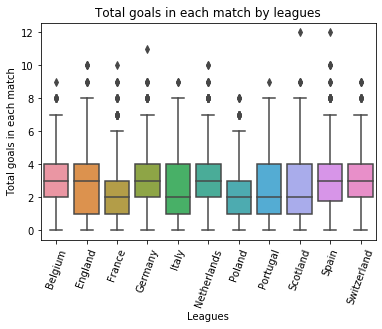

In [21]:
# plot the number of goals in each match for each leagues
ax = sns.boxplot(x="name", y="total_goals", data=df_match)
ax.set_xticklabels(short_leagues,rotation=70);
plt.xlabel('Leagues')
plt.ylabel('Total goals in each match')
plt.title('Total goals in each match by leagues');

In the above figure, distribution of total goals per match is plotted for 11 leagues. The averages of goals per match are in the range of 2-4 goals.

The distributions of 'England', 'Italy', 'Portualgal' and 'Scotland' are quite similar, that most of data is located between a large range namely 0 to 8. However, matches from 'Portualgal' and 'Scotland' has the most goals (12 goals) during 2008-2016.

It is also interesting to know that most of the leagues as 75% of match with less than 5 goals, while 75% of matches in 'France' and 'Poland' have less than 3 goals in general.

### 3.3 Question: How does age affect the potential of the player?
> Players have profound influence on teams and matches. Therefore if a team wants to buy a player, it is important to know the player's potential. In common sense, for professional sport players age is one of the key factors to evaluate the potential of a player. In this section, the relation between potential and age were investigated.

#### 3.3.1 Histogram  and statistics of Age

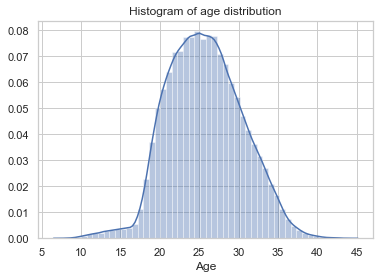

In [22]:
# plot the histogram of the age
sns.set(style='whitegrid')
fig = sns.distplot(df_player.Age)
fig.set_title('Histogram of age distribution');

In [23]:
df_player.Age.describe()
# fig_box = sns.boxplot(df_player.Age)
# fig_box.set_title('Boxplot of age distribution');

count    183142.000000
mean         25.719684
std           4.730976
min           7.840000
25%          22.270000
50%          25.530000
75%          28.967500
max          43.830000
Name: Age, dtype: float64

In [24]:
df_player.nunique()

player_api_id     11060
overall_rating       61
potential            56
date                197
birthday           5762
Age                3158
dtype: int64

According to the histogram and the statistics, the average age is 25.7 while the oldest and youngst player is 7.84 and 43.8 years old. Nevertheless for different players, it is likely that they have different potential at the same age.

#### 3.3.2 Age vs. average potential
Since we have players that have different potentials at same age, the data is plotted as age against the average potentials at that age.

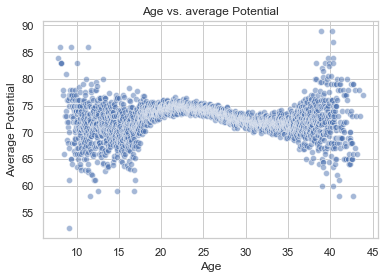

In [25]:
# scatter plot of the Age against average potential
Age_potential = df_player.groupby('Age').potential.mean()
Age_scat = sns.scatterplot(Age_potential.index,Age_potential.array,alpha=0.5)
Age_scat.set_title('Age vs. average Potential')
plt.ylabel('Average Potential');

#### 3.3.3 Age vs. average potential in interval [22-18]
As shown in the scatterplot above, when the age is in the interval between 20 and 30, there is a negative relationship between age and potential. Outside the interval, there is no obvious relationship between age and potential.

We zoomed in the interval between 22 and 28 (25%-75% age distribution).

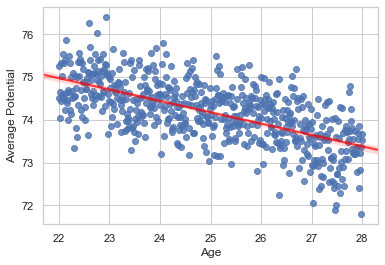

In [26]:
# select the data in the interval of [22-28] years old
Age_filter = (df_player.Age <=28) & (df_player.Age >= 22)
Age_potential = df_player[Age_filter].groupby('Age').potential.mean()
# plot the data as scatter plot to show the relationship.
x,y = Age_potential.index,Age_potential.array
Age_lmplot = sns.regplot(x=x,y=y, truncate=False,line_kws={'color': 'red',"alpha":0.7})
Age_scat.set_title('Age vs. average Potential')
plt.ylabel('Average Potential');

The figure above indicates that there is a negative relationship between age and average potential in the age interval [22-28].

#### 3.4 Question: What team attributes lead to vectories?
> In this section, all teams are ranking by the total wins. Then, top 10 teams and bottom 10 teams were selected for attributes comparison. This was done by creating a new dataframe with win_team_apis for each match and then, counted and ranked the wins by each team. Finally, corresponding attributes of the selected teams were extracted from dataset `Team_Attributes` for comparison.

#### 3.4.1 Select win teams for all matches

In [27]:
# creating a new dataframe to record win team for each match.
df_home_win = df_match[home_win].iloc[:,np.r_[0,4]]
df_home_win= df_home_win.rename(columns={"home_team_api_id":"win_team_api_id"})
df_away_win = df_match[away_win].iloc[:,np.r_[0,5]]
df_away_win=df_away_win.rename(columns={"away_team_api_id":"win_team_api_id"})
df_win = df_home_win.append(df_away_win)
df_win.head(5)

,league_id,win_team_api_id
3,1,9991
8,1,10001
9,1,8342
21,1,9984
25,1,10001


In [28]:
# count the number of wins for each team.
win_nums_team = df_win.groupby('win_team_api_id')['win_team_api_id'].count()
win_nums_team.describe()

count    299.000000
mean      64.826087
std       51.802767
min        3.000000
25%       20.000000
50%       56.000000
75%       97.500000
max      234.000000
Name: win_team_api_id, dtype: float64

There is in total 299 teams. The top 1 team wined 234 matches and the bottom 1 wined only 3 teams, while in average teams have 64 wins from 2008-2016.
#### 3.4.2 Select top and bottom 10 teams and extract their attributes

In [29]:
# find the top 10 teams and bottom 10 teams
top_10_team = win_nums_team.sort_values(ascending=False)[0:10]
# selected more data in case having missing info for some teams
bottom_10_team = win_nums_team.sort_values(ascending=False)[-14:-1] 

In [30]:
# For top teams extracting their attributes
top_team_attr_mean = pd.DataFrame()
for team in top_10_team.index:
    team_attr_mean = df_team_attr[df_team_attr.team_api_id == team].iloc[:,1:8].mean()
    top_team_attr_mean = pd.concat([top_team_attr_mean,team_attr_mean],axis = 1)
top_team_attr_mean.columns = top_10_team.index
top_team_attr_mean.transpose().describe()

,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,49.433333,41.666667,54.450000,56.050000,57.566667,53.100000
std,8.666026,8.068763,8.702933,10.762604,7.235970,6.401774
min,35.166667,32.833333,38.500000,33.333333,49.666667,44.000000
25%,46.541667,34.291667,50.166667,55.000000,52.625000,48.750000
50%,50.833333,41.750000,55.666667,59.750000,54.583333,53.333333
75%,54.208333,45.750000,59.791667,62.583333,64.458333,56.458333
max,61.333333,57.333333,67.500000,66.833333,69.000000,64.333333


In [31]:
# For bottom teams extracting their attributes
bottom_team_attr_mean = pd.DataFrame()
for team in bottom_10_team.index:
    team_attr_mean = df_team_attr[df_team_attr.team_api_id == team].iloc[:,2:8].mean()
    bottom_team_attr_mean = pd.concat([bottom_team_attr_mean,team_attr_mean],axis = 1)
bottom_team_attr_mean.columns = bottom_10_team.index
bottom_team_attr_mean

win_team_api_id,8690,9765,9878,9798,6351,6547,4064,8457,7992,6631,9912,8357,108893
buildUpPlaySpeed,52.8,NaN,59.6,50.833333,50.0,54.0,NaN,55.0,NaN,39.0,49.333333,59.833333,43.166667
buildUpPlayPassing,44.4,NaN,50.8,58.666667,55.0,39.0,NaN,60.0,NaN,62.0,59.333333,45.666667,53.166667
chanceCreationPassing,44.8,NaN,50.0,60.166667,50.0,52.0,NaN,46.0,NaN,62.0,48.666667,50.666667,46.000000
chanceCreationCrossing,54.6,NaN,52.0,60.500000,55.0,56.0,NaN,68.0,NaN,66.0,51.333333,51.000000,38.333333
chanceCreationShooting,55.4,NaN,46.2,49.500000,55.0,38.0,NaN,54.0,NaN,48.0,48.000000,50.833333,39.500000
defencePressure,38.2,NaN,37.8,52.666667,50.0,40.0,NaN,42.0,NaN,51.0,39.666667,46.666667,38.333333


#### 3.4.3 Drop the team with missing attributes for bottom teams
Notice that the attributes' data of some teams are missing which means FIFA do not have data in the database. In order to align with the top 10 teams, the last 10 team with valid attributes information are selected.

In [32]:
bottom_team_attr_mean.dropna(axis = 1, inplace = True)
bottom_team_attr_mean.transpose().describe()

,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,51.356667,52.803333,51.030000,55.276667,48.443333,43.633333
std,6.566940,7.705993,5.792853,8.412073,5.995946,5.858011
min,39.000000,39.000000,44.800000,38.333333,38.000000,37.800000
25%,49.500000,46.950000,46.666667,51.500000,46.650000,38.666667
50%,51.816667,54.083333,50.000000,54.800000,48.750000,41.000000
75%,54.750000,59.166667,51.666667,59.375000,53.208333,49.166667
max,59.833333,62.000000,62.000000,68.000000,55.400000,52.666667


#### 3.4.4 Plotting the distribution of attributes
In order to have an intuitive understanding of the attributes for top and bottom teams, each attribute is compared for two groups in a boxplot.

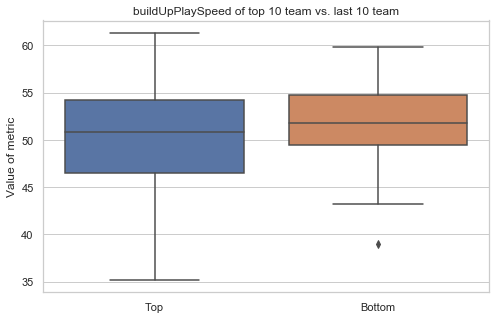

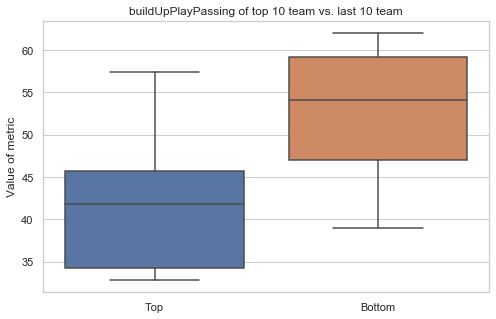

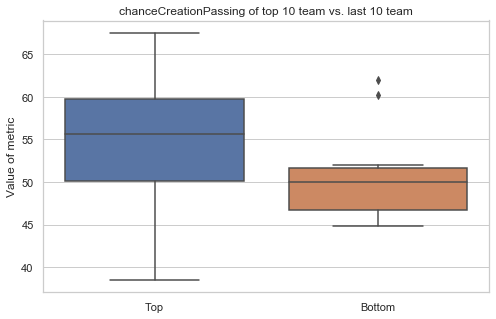

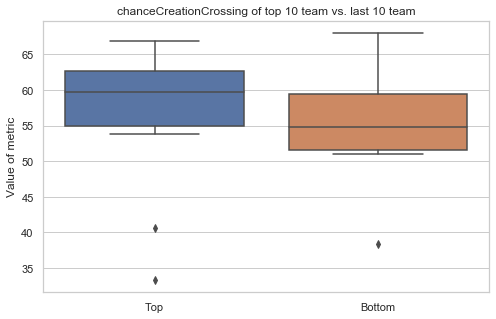

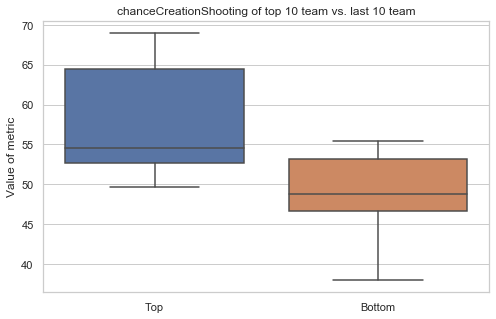

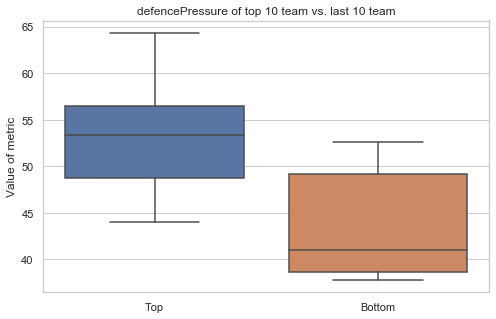

In [33]:
for i, col in enumerate(bottom_team_attr_mean.transpose().columns):
    plt.figure(i,figsize=(8,5))
    df = pd.DataFrame({'Top': top_team_attr_mean.transpose().reset_index()[col],
                       'Bottom': bottom_team_attr_mean.transpose().reset_index()[col]})
    sns.boxplot(data = df);
    plt.savefig('{}.png'.format(col))
    plt.ylabel('Value of metric')
    plt.title('{} of top 10 team vs. last 10 team'.format(col));
   

The boxplots above show the distribution of each attribute of top 10 teams and bottom 10 teams. 
>**buildUpPlaySpeed:** 
In general, the build up play speeds for top and bottom teams are at the same level which is around 52. While the top teams has almost two times of speed range compared to the one for bottom teams, the bottom teams has a relative more stable speeds. Most of the speeds from bottom teams lie on the interval of [43-60].

>**buildUpPlayPassing:** 
For buildUpPlayPassing, the median of bottom teams(52.8) is much larger than the one of top teams (41.7). It is noticably that all buildupplayingpass for the top teams are lower than 75% of the bottom teams. 

>**chanceCreationCrossing:** 
Top teams has higher median and more stable performance regarding chanceCreationCrossing.The distribution of top teams skew to the left while the one for bottom teams skews to the right.

>**chanceCreationPassing:** 
Top teams has higher median regarding chance creation passing. Similar to build up play speed, the top teams has almost two times of speed range compared to the one for bottom teams. 

>**defencepressure:** 
Top teams has higher median and more than 75% of the top teams shooting more than 50% of the bottom teams. The range of the two groups are similar which is approximately 20.


<a id='conclusions'></a>
## 4 Conclusions and Limitations
### 4.1 Conclusions
#### Home win 
According to the results in section 3.1, the home advantage is a common phenomina regardless of the season and league.
#### League with most goals
According to the results in section 3.2, you can choose any leauges apart from 'France' and 'Poland'. However, if you expect a match more than 10 goals, you can try 'Germany', 'Scotland' and 'Spain'.
#### The effect of age on potential
According to the results in section 3.3, the relationship between age and average potential is negative in the interval of 22 to 28 years old.
#### Attributes leads to vectories
According to the results in sectoin 3.4, the team with most wins have higher chance creating crossing, passing and defence pressure. But how these attributes affect the vectories and the weights from each attributes required more investigation.


### 4.2 Limitations
**Dataset:** The missing values are minor compared to the total records in the database. Therefore, the data distribution and statistics are considered as objective.
**Conclusion:** This report does not include any forms of hypothesis, all the information in the conclusion section is the results from EDA. By statistics tests, the relationship between variables can be derived by p-values which indicate the convincing of the null hypothesis.


<a id='Appendix'></a>
## 5 Appendix
> This section includes the code for data extraction.

<a id='SQL'></a>
### SQL

The information regarding teams is extracted from table 'Player' and 'Player_Attributes'
```sql
SELECT
league_id,
season,
home_team_goal,
away_team_goal,
Match.date,
League.name
FROM Match
LEFT JOIN 
(SELECT id,name FROM League)
League on league_id = League.id
```
The information regarding team attribute is extracted from the table 'Team_Attributes'
```sql
SELECT
team_api_id,
Team_Attributes.date,
buildUpPlaySpeed,
buildUpPlayDribbling,
buildUpPlayPassing,
chanceCreationPassing,
chanceCreationCrossing,
chanceCreationShooting,
defencePressure,
defenceAggression,
defenceTeamWidth,
defenceDefenderLineClass
FROM Team_Attributes
```

The information regarding players is extracted from table 'Player' and 'Player_Attributes'
```sql
SELECT 
Player_Attributes.player_api_id,
overall_rating,
potential,
Player_Attributes.date,
Player.birthday
FROM Player_Attributes
JOIN Player on Player_Attributes.player_api_id = Player.player_api_id
```